# Ford GoBike System Data
## by Mohamed Ateya

## Preliminary Wrangling

This data set includes information about individual rides madein a bike-sharing system covering the greater San FranciscoBay area. <br>
Each trip is anonymized and includes:
- Trip Duration (seconds)
- Start Time and Date
- End Time and Date
- Start Station ID
- Start Station Name
- Start Station Latitude
- Start Station Longitude
- End Station ID
- End Station Name
- End Station Latitude
- End Station Longitude
- Bike ID
- User Type (Subscriber or Customer – “Subscriber” = Member or “Customer” = Casual)

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [2]:
#reading the data and view some rows
df = pd.read_csv('2017-fordgobike-tripdata.csv')
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type
0,80110,2017-12-31 16:57:39.6540,2018-01-01 15:12:50.2450,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer
1,78800,2017-12-31 15:56:34.8420,2018-01-01 13:49:55.6170,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,37.766210,-122.426614,88,Customer
2,45768,2017-12-31 22:45:48.4110,2018-01-01 11:28:36.8830,245,Downtown Berkeley BART,37.870348,-122.267764,245,Downtown Berkeley BART,37.870348,-122.267764,1094,Customer
3,62172,2017-12-31 17:31:10.6360,2018-01-01 10:47:23.5310,60,8th St at Ringold St,37.774520,-122.409449,5,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,2831,Customer
4,43603,2017-12-31 14:23:14.0010,2018-01-01 02:29:57.5710,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247,Fulton St at Bancroft Way,37.867789,-122.265896,3167,Subscriber


In [3]:
df.shape

(519700, 13)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519700 entries, 0 to 519699
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             519700 non-null  int64  
 1   start_time               519700 non-null  object 
 2   end_time                 519700 non-null  object 
 3   start_station_id         519700 non-null  int64  
 4   start_station_name       519700 non-null  object 
 5   start_station_latitude   519700 non-null  float64
 6   start_station_longitude  519700 non-null  float64
 7   end_station_id           519700 non-null  int64  
 8   end_station_name         519700 non-null  object 
 9   end_station_latitude     519700 non-null  float64
 10  end_station_longitude    519700 non-null  float64
 11  bike_id                  519700 non-null  int64  
 12  user_type                519700 non-null  object 
dtypes: float64(4), int64(4), object(5)
memory usage: 51.5+ MB


In [5]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id
count,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000
mean,1099.009521,95.034245,37.771653,-122.363927,92.184041,37.771844,-122.363236,1672.533079
std,3444.146451,86.083078,0.086305,0.105573,84.969491,0.086224,0.105122,971.356959
min,61.000000,3.000000,37.317298,-122.444293,3.000000,37.317298,-122.444293,10.000000
25%,382.000000,24.000000,37.773492,-122.411726,23.000000,37.774520,-122.410345,787.000000
50%,596.000000,67.000000,37.783521,-122.398870,66.000000,37.783830,-122.398525,1728.500000
75%,938.000000,139.000000,37.795392,-122.391034,134.000000,37.795392,-122.391034,2520.000000
max,86369.000000,340.000000,37.880222,-121.874119,340.000000,37.880222,-121.874119,3733.000000


In [6]:
#search for duplicates
df.duplicated().any()

False

In [7]:
#convert the duration from seconds to minutes to manage and decrease the noise
df['duration_sec'] = round(df['duration_sec'] / 60)
df =df.rename(columns={'duration_sec':'duration_mints'}) #rename the column from seconds to minutes

In [8]:
#converting the start_time and end_time form strings to datetime datatype
df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519700 entries, 0 to 519699
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_mints           519700 non-null  float64       
 1   start_time               519700 non-null  datetime64[ns]
 2   end_time                 519700 non-null  datetime64[ns]
 3   start_station_id         519700 non-null  int64         
 4   start_station_name       519700 non-null  object        
 5   start_station_latitude   519700 non-null  float64       
 6   start_station_longitude  519700 non-null  float64       
 7   end_station_id           519700 non-null  int64         
 8   end_station_name         519700 non-null  object        
 9   end_station_latitude     519700 non-null  float64       
 10  end_station_longitude    519700 non-null  float64       
 11  bike_id                  519700 non-null  int64         
 12  user_type       

In [9]:
#add distance feature (using latitudes and longitudes)
import math
def distance(row):
    radius = 6371 # km
    lat1 = row.start_station_latitude
    lon1= row.start_station_longitude
    lat2 = row.end_station_latitude
    lon2 = row.end_station_longitude

    dlat = math.radians(lat2-lat1)
    dlon = math.radians(lon2-lon1)
    a = math.sin(dlat/2) * math.sin(dlat/2) + math.cos(math.radians(lat1)) \
        * math.cos(math.radians(lat2)) * math.sin(dlon/2) * math.sin(dlon/2)
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
    d = radius * c

    return d

df['distance'] = df.apply(lambda x: distance(x),axis =1)
df['distance'][:10]

0    0.942931
1    3.069727
2    0.000000
3    1.046622
4    0.636339
5    0.000000
6    0.000000
7    0.000000
8    0.000000
9    0.000000
Name: distance, dtype: float64

In [10]:
#extract important features from the starttime col (time, week_day, month)

df['strat_day_time'] = df['start_time'].dt.hour
df['week_day'] = df['start_time'].dt.dayofweek
df['month'] = df['start_time'].dt.month


In [11]:
#drop the unnecessary cols 
droped = ['start_time','end_time','start_station_id','start_station_latitude','start_station_longitude',
         'end_station_id','end_station_latitude','end_station_longitude','bike_id']
df.drop(droped, axis =1, inplace = True)

In [12]:
df.head()

,duration_mints,start_station_name,end_station_name,user_type,distance,strat_day_time,week_day,month
0,1335.0,Laguna St at Hayes St,San Francisco Public Library (Grove St at Hyde...,Customer,0.942931,16,6,12
1,1313.0,Yerba Buena Center for the Arts (Howard St at ...,Dolores St at 15th St,Customer,3.069727,15,6,12
2,763.0,Downtown Berkeley BART,Downtown Berkeley BART,Customer,0.000000,22,6,12
3,1036.0,8th St at Ringold St,Powell St BART Station (Market St at 5th St),Customer,1.046622,17,6,12
4,727.0,Bancroft Way at Telegraph Ave,Fulton St at Bancroft Way,Subscriber,0.636339,14,6,12


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519700 entries, 0 to 519699
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   duration_mints      519700 non-null  float64
 1   start_station_name  519700 non-null  object 
 2   end_station_name    519700 non-null  object 
 3   user_type           519700 non-null  object 
 4   distance            519700 non-null  float64
 5   strat_day_time      519700 non-null  int64  
 6   week_day            519700 non-null  int64  
 7   month               519700 non-null  int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 31.7+ MB


In [14]:
df.describe()

,duration_mints,distance,strat_day_time,week_day,month
count,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000
mean,18.316881,1.587077,13.461037,2.637048,9.731716
std,57.403004,1.010391,4.615019,1.859312,1.566787
min,1.000000,0.000000,0.000000,0.000000,6.000000
25%,6.000000,0.899642,9.000000,1.000000,8.000000
50%,10.000000,1.400244,14.000000,3.000000,10.000000
75%,16.000000,2.072494,17.000000,4.000000,11.000000
max,1439.000000,68.186787,23.000000,6.000000,12.000000


### What is the structure of your dataset?

after preliminary wrangling the data has 519700 entries, each row includes:
- duration_mints (the duration of the trip in minutes)
- start_station_name
- end_station_name
- user_type 
- distance (the distance between the start and the end station)
- strat_day_time
- week_day 
- month

### What is/are the main feature(s) of interest in your dataset?
the features of interest are the duration of the trip and its relation with other features, the number of taken trips in terms of time, week day, and month, and how the type of the user affects all of that.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

The relatively unnecessary features for the analysis have been already droped, So the features that will hopefully help are:
- duration_mints
- user_type
- distance
- strat_day_time
- week_day 
- month

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

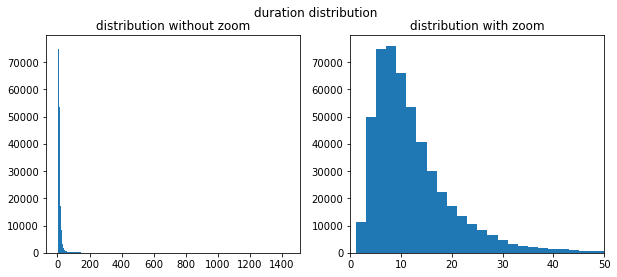

In [15]:
#looking at the trips duration distribution
plt.figure(figsize =(10,4))
plt.subplot(1,2,1, title ='distribution without zoom')
bins = np.arange(1, df['duration_mints'].max()+2,2)
plt.hist(data = df, x ='duration_mints', bins =bins);

plt.subplot(1,2,2, title ='distribution with zoom')
bins = np.arange(1, df['duration_mints'].max()+2,2)
plt.hist(data = df, x ='duration_mints', bins =bins);
plt.xlim(0,50);
plt.suptitle('duration distribution');

In [16]:
#proportion of entries that have duration > 50 minutrs
df[df['duration_mints'] > 50].shape[0] / df.shape[0]

0.03602078121993458

The distribution of the duration have outliers, so we will drop entries of duration greater than 50 minutes. That supposed to not affect the analysis because their proportion is about 0.036 of the data.

In [17]:
df.drop(df[df['duration_mints'] > 50].index , axis = 0, inplace = True)
df.shape

(500980, 8)

count    500980.000000
mean         11.643287
std           7.746720
min           1.000000
25%           6.000000
50%          10.000000
75%          15.000000
max          50.000000
Name: duration_mints, dtype: float64

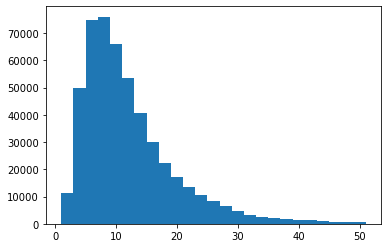

In [18]:
#duration distribution
bins = np.arange(1, df['duration_mints'].max()+2,2)
plt.hist(data = df, x ='duration_mints', bins =bins);
df['duration_mints'].describe()

> The duration is right skewed, 75% of durations is less than or equal 15 minutes.

In [19]:
#user type investigation
df.user_type.value_counts()

Subscriber    406224
Customer       94756
Name: user_type, dtype: int64

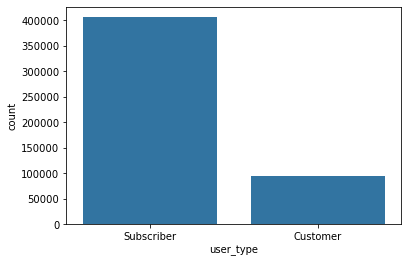

In [20]:
color = sb.color_palette()[0]
sb.countplot(data = df, x ='user_type', color = color);

In [21]:
df.user_type.value_counts() / df.shape[0]

Subscriber    0.810859
Customer      0.189141
Name: user_type, dtype: float64

>The user_type is skewed and not balanced that we have about 81% Subscriber type.

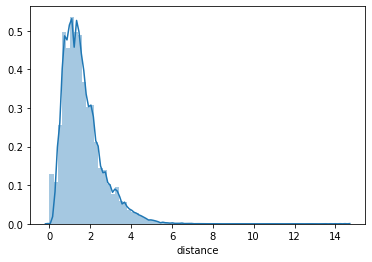

In [22]:
#distance investigation
bins = np.arange(df.distance.min(), df.distance.max()+0.2, 0.2)
sb.distplot(df.distance, bins =bins );

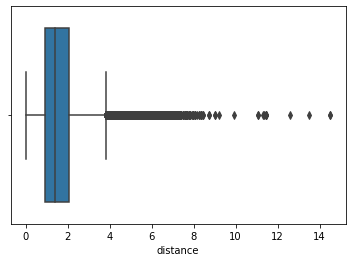

In [23]:
#boxplot for more investigation
sb.boxplot(data =df, x ='distance');
#plt.xlim(0,8)

In [24]:
df.distance.describe()

count    500980.000000
mean          1.596853
std           0.970601
min           0.000000
25%           0.919826
50%           1.407962
75%           2.072494
max          14.509783
Name: distance, dtype: float64

>The mean of the distance is about 1.6 Km, and it has alot of outliers. <br>
We can convert it to categorical variable to avoid the noise, and to try to handle the outliers more efficient. 

In [25]:
#binnig the distance

#the maximum distance is 14.509783 km, I will limit it to 14.5 km to make it easier to use.
def lim_dis(x):
    if x.distance > 14.5:
        return 14.5
    return x.distance

df.distance = df.apply(lambda x: lim_dis(x), axis =1 )
bins = [0,0.5,1,1.5,2,2.5,3,3.5,4,df.distance.max()]
labels = [f'{b:.2f}' for b in bins[1:]]
df['distance'] = pd.cut(df.distance,bins =bins, labels = labels)
df.distance.value_counts()

1.50     127868
1.00     108628
2.00      91994
2.50      61201
3.00      29814
0.50      23442
3.50      20671
14.50     13344
4.00      11483
Name: distance, dtype: int64

In [26]:
#make it categorical 
dist = pd.api.types.CategoricalDtype(categories=labels, ordered =True)
df.distance = df.distance.astype(dist)

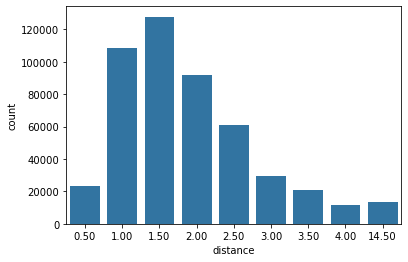

In [27]:
#make a count plot for the new distance feature 
sb.countplot(data =df, x ='distance', color = color );

>the distribution is right skewed, and there is low proportion of distances between 4 and 14.5 km 

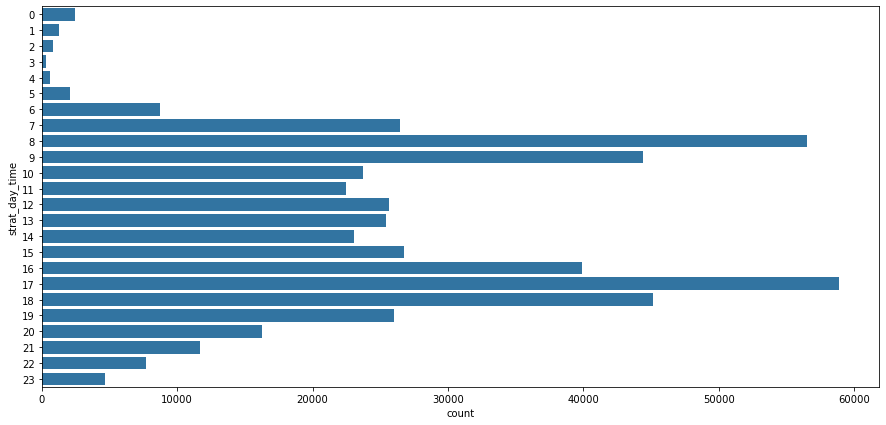

In [28]:
#strat_day_time investigation

#to catigorical
time = np.arange(0,24) 
time = pd.api.types.CategoricalDtype(categories= time, ordered= True)
df.strat_day_time = df.strat_day_time.astype(time)

#ploting
plt.figure(figsize =(15,7))
sb.countplot(data =df, y = 'strat_day_time', color =color);

>Hours(8, 9, 16, 17, 18) have a relatively high number of trips -Morning and afternoon-.<br>
From midnight to 5 Am have relatively low trips.


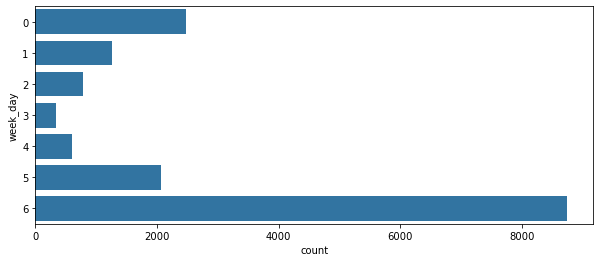

In [29]:
#week_day investigation

#to catigorical
time = np.arange(0,7) 
week_days = pd.api.types.CategoricalDtype(categories= time, ordered= True)
df.week_day = df.strat_day_time.astype(week_days)

#ploting
plt.figure(figsize =(10,4))
sb.countplot(data =df, y = 'week_day', color =color);

>Weekends have the highest number of trips.

In [30]:
df.month.value_counts()

10    105684
9      94483
11     93260
12     84418
8      79401
7      41170
6       2564
Name: month, dtype: int64

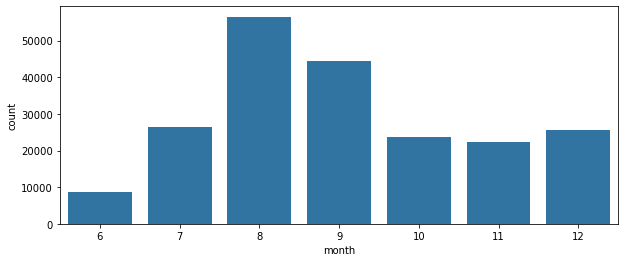

In [31]:
#month investigation

#to catigorical
m = np.arange(6,13) 
mnth = pd.api.types.CategoricalDtype(categories= m, ordered= True)
df.month = df.strat_day_time.astype(mnth)

#ploting
plt.figure(figsize =(10,4))
sb.countplot(data =df, x = 'month', color =color);

>The data here is from June to December only. <br>
It is obvious that Aug has the highest trips rate.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

The duration and the number of trips are the variables of interest.<br>
- duration distribution:
    - The duration is right-skewed.
    - 75% of durations are less than or equal to 15 minutes.
    - The mean duration = 11.64 minute.
- The number of trips:
    - The frequency of trips in terms of the time of the day, the day of the week, and the month are all skewed and show that people take trips in some times more than others.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

- The distribution of the duration variable shows outliers that with a proportion of 0.036 of the data, so I Limited the durations to 50 minutes by dropping the data with greater than it.<br>
- I engineered a new feature (distance) using latitudes and longitudes of the stations, and on investigating it, it showed a high noise, so I converted it to a categorical variable by binning the values of it and it then showed more acceptable distribution.

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

C:\Users\East-Sound\anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


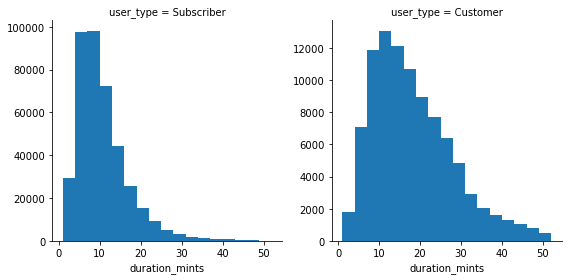

In [32]:
#investigating the relationship between the type of user and the duration
bins = np.arange(df.duration_mints.min(), df.duration_mints.max() +3, 3)
g = sb.FacetGrid(df, col ='user_type', size =4,sharey=False)
g.map(plt.hist, 'duration_mints',bins = bins);

In [33]:
#statistics of duration for user_type 'Subscriber'
subscriber_stats = df[df['user_type'] == 'Subscriber'].loc[:,'duration_mints'].describe()
subscriber_stats

count    406224.000000
mean         10.225046
std           6.385694
min           1.000000
25%           6.000000
50%           9.000000
75%          13.000000
max          50.000000
Name: duration_mints, dtype: float64

In [34]:
#statistics of duration for user_type 'Customer'
customer_stats =df[df['user_type'] == 'Customer'].loc[:,'duration_mints'].describe()
customer_stats

count    94756.000000
mean        17.723363
std          9.842853
min          1.000000
25%         10.000000
50%         16.000000
75%         24.000000
max         50.000000
Name: duration_mints, dtype: float64

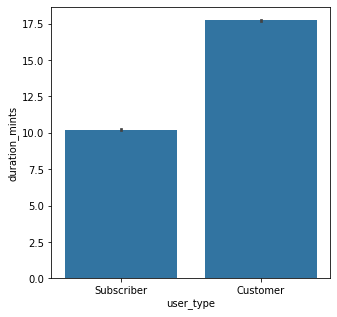

In [35]:
plt.figure(figsize = (5,5))
sb.barplot(data =df,x = 'user_type', y ='duration_mints',color = color);

>The trip mean duration in minutes that the Customer user_type use greater than the Subscriber user_type.

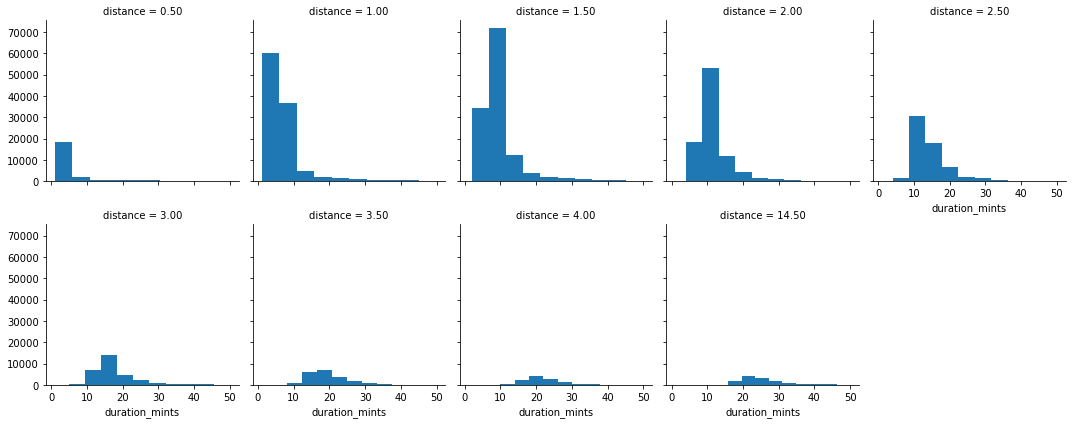

In [36]:
#investigating the relationship between the duration and the distance
#I have converted the distance variable priviously to a categorical variable, So we treat it as one.

g = sb.FacetGrid(data =df, col ='distance', col_wrap=5)
g.map(plt.hist, 'duration_mints');

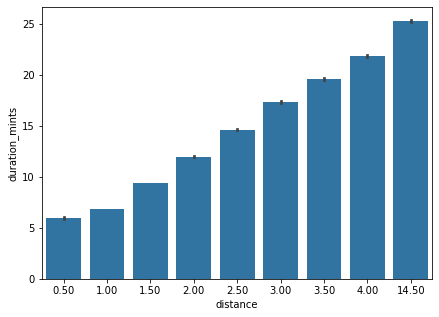

In [37]:
#ploting the durations time means regarding the distance
#I have converted the distance variable priviously to a categorical variable, So we treat it as one.
plt.figure(figsize = (7,5))
sb.barplot(data =df,x = 'distance', y ='duration_mints',color = color);

>as expected, the greater the distance between the start and the end stations, the greater the mean trip duration time.

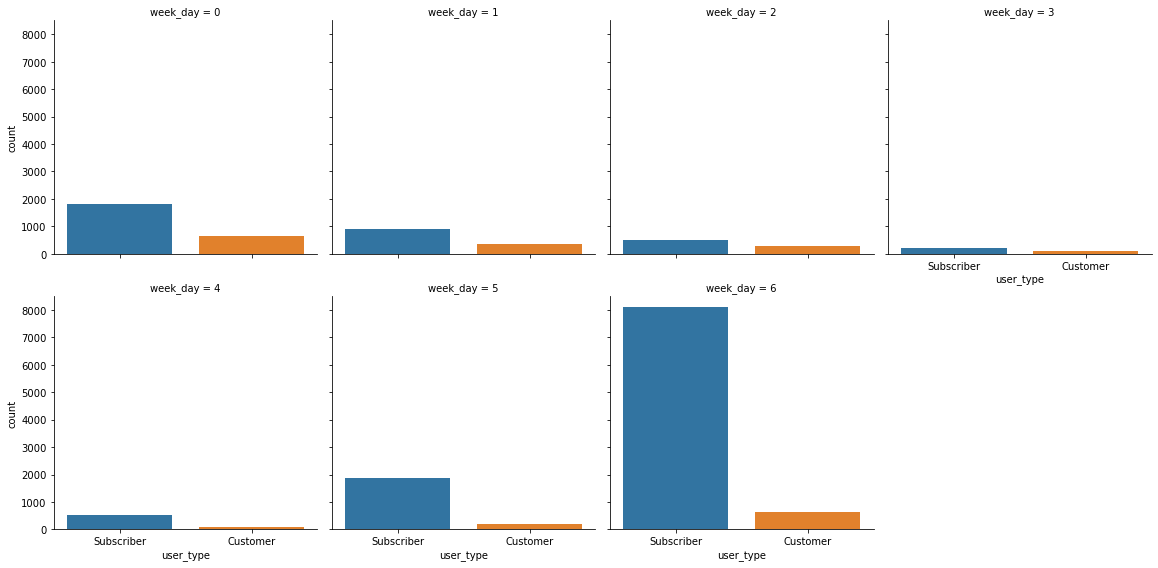

In [38]:
# investigating the day of week and the type of user.
sb.catplot("user_type", col="week_day" , data=df,kind="count", height=4, aspect=1, col_wrap=4)

>the subscribers are more than the Customers regardless of the weekday, but the weekend is the highest day for both. we can notice also that the number of customers on the first day of the week is close to the number of customers on the weekend when the subscribers’ number decreased by order of magnitude!

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

- In terms of trip duration:
    - The trip mean duration time in minutes that the Customer user type use is greater than the Subscriber user type.
    - As expected, the greater the distance between the start and the end stations, the greater the mean trip duration time.
- In tirms of Number of trips:
    - the subscribers are more than the Customers regardless of the weekday, but the weekend is the highest day for both. we can notice also that the number of customers on the first day of the week is close to the number of customers on the weekend when the subscribers’ number decreased by order of magnitude!


### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> All investigations were directed to the featurs of interest.

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

C:\Users\East-Sound\anaconda3\lib\site-packages\seaborn\axisgrid.py:728: UserWarning: Using the violinplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


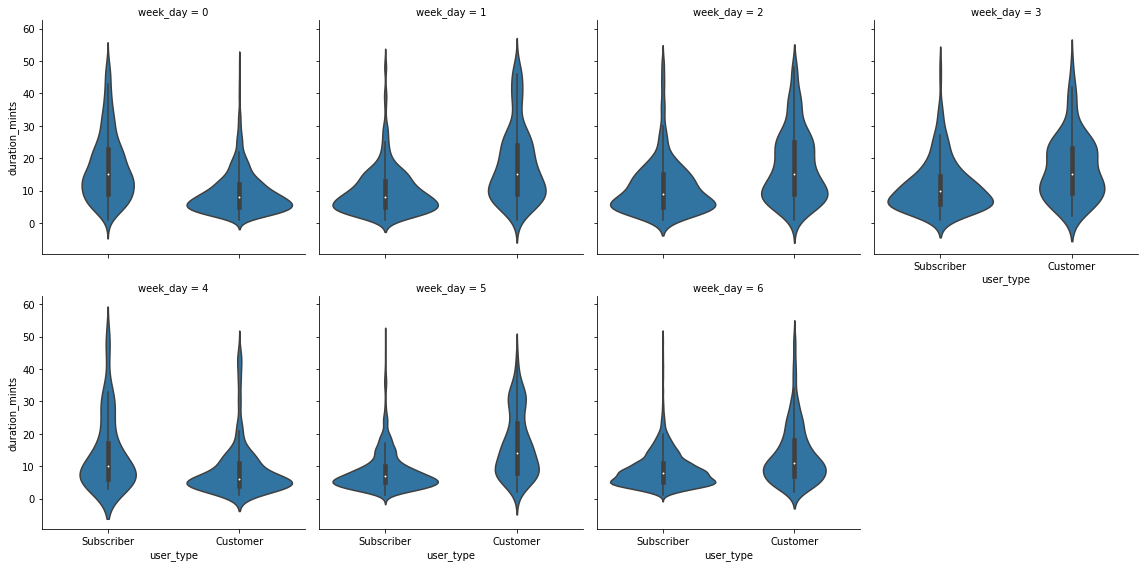

In [39]:
#week day, duration, user type
g = sb.FacetGrid(data =df, col ='week_day',col_wrap=4,size = 4)
g.map(sb.violinplot, 'user_type', 'duration_mints');

- In most of the days the trip duration time of the subscribers is short compared to the customers'.
- Except on the first day of the week, more subscribers take more time. and more Customers take shorter time.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

In the last multivariate exploration plot we strengthened the observation that behavior of the user type of subscribers is different from the customer users type.  


### Were there any interesting or surprising interactions between features?

YES!, the interaction between the features of the time (day time, week day, and month) and the duration time!.

In [40]:
#save the cleaned data as csv to the presentation
df.to_csv('cleaned.csv', index= False)

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!